In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [64]:
## Linear Regression Model



In [65]:
# next load the data
df = pd.read_excel(r'C:\Users\syzha\Downloads\RMF-Offer.xlsx')
df.head()

,Recency,Frequency,Monetary,bogo?,discount?
0,0,0,0,0,0
1,0,0,0,0,0
2,0,1,1,1,0
3,0,0,0,0,0
4,1,0,0,0,1


In [66]:
df.shape

(14825, 5)

In [67]:
df.corr()

,Recency,Frequency,Monetary,bogo?,discount?
Recency,1.000000,0.193749,0.177754,0.113935,0.180768
Frequency,0.193749,1.000000,0.585965,0.522213,0.489658
Monetary,0.177754,0.585965,1.000000,0.476083,0.408521
bogo?,0.113935,0.522213,0.476083,1.000000,0.232720
discount?,0.180768,0.489658,0.408521,0.232720,1.000000


In [68]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [69]:
# seperate input features in x
x = df.drop(['bogo?','discount?'], axis=1)

# store the target variable in y
y1= df['bogo?']
y2= df['discount?']

In [70]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset for 'bogo'
x_train, x_test, y1_train, y1_test = train_test_split(x,y1, test_size=0.2, random_state=1234)

In [71]:
x_train.shape, y1_train.shape, x_test.shape, y1_test.shape

((11860, 3), (11860,), (2965, 3), (2965,))

In [72]:
# train your model
lrmodel1 = LinearRegression().fit(x_train,y1_train)

# make preditions on train set
train_pred1 = lrmodel1.predict(x_train)

In [73]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae1 = mean_absolute_error(train_pred1, y1_train)
print('y1 Train error is', train_mae1)

y1 Train error is 0.3300332341165023


In [74]:
lrmodel1.coef_

array([0.0061242 , 0.36598856, 0.24592989])

In [75]:
lrmodel1.intercept_

0.32031928159983153

In [76]:
# make predictions on test set
y1pred = lrmodel1.predict(x_test)

#evaluate the model
test_mae1 = mean_absolute_error(y1pred, y1_test)
print('y1 Test error is', test_mae1)

y1 Test error is 0.32280375391946375


In [ ]:
## Decision Tree Model




In [99]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [100]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [101]:
# train the model
dtmodel1 = dt.fit(x_train,y1_train)

In [102]:
# make predictions using the test set
y1test_pred = dtmodel1.predict(x_test)

In [104]:
# evaluate the model
test_mae1 = mean_absolute_error(y1test_pred, y1_test)
test_mae1

0.3193466770971314

In [105]:
# make predictions on train set
y1train_pred = dtmodel1.predict(x_train)

In [106]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae1= mean_absolute_error(y1train_pred, y1_train)
train_mae1

0.32513675059092756

In [107]:
# get the features
dtmodel1.feature_names_in_

array(['Recency', 'Frequency', 'Monetary'], dtype=object)

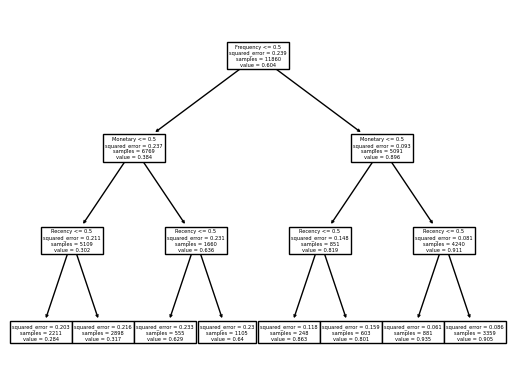

<Figure size 640x480 with 0 Axes>

In [108]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel1, feature_names=dtmodel1.feature_names_in_.tolist())

#tree.plot_tree(dtmodel)
plt.show()

# Save the plot to a file
plt.savefig('tree.png', dpi=300)


In [ ]:
## Random Forest Model




In [110]:
# import Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [111]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [112]:
# train the model
rfmodel1 = rf.fit(x_train,y1_train)

In [113]:
# make prediction on train set
y1train_pred = rfmodel1.predict(x_train)

In [114]:
# make predictions on the x_test values
y1test_pred = rfmodel1.predict(x_test)

In [115]:
# evaluate the model
test_mae1 = mean_absolute_error(y1test_pred, y1_test)
test_mae1

0.21315345699831367

In [116]:
train_mae1 = mean_absolute_error(y1train_pred, y1_train)
train_mae1

0.22588532883642495

[Text(0.5, 0.875, 'Frequency <= 0.5\nabsolute_error = 0.396\nsamples = 7469\nvalue = 1.0'),
 Text(0.25, 0.625, 'Monetary <= 0.5\nabsolute_error = 0.388\nsamples = 4260\nvalue = 0.0'),
 Text(0.125, 0.375, 'Recency <= 0.5\nabsolute_error = 0.305\nsamples = 3191\nvalue = 0.0'),
 Text(0.0625, 0.125, 'absolute_error = 0.29\nsamples = 1383\nvalue = 0.0'),
 Text(0.1875, 0.125, 'absolute_error = 0.317\nsamples = 1808\nvalue = 0.0'),
 Text(0.375, 0.375, 'Recency <= 0.5\nabsolute_error = 0.362\nsamples = 1069\nvalue = 1.0'),
 Text(0.3125, 0.125, 'absolute_error = 0.36\nsamples = 347\nvalue = 1.0'),
 Text(0.4375, 0.125, 'absolute_error = 0.362\nsamples = 722\nvalue = 1.0'),
 Text(0.75, 0.625, 'Recency <= 0.5\nabsolute_error = 0.105\nsamples = 3209\nvalue = 1.0'),
 Text(0.625, 0.375, 'Monetary <= 0.5\nabsolute_error = 0.083\nsamples = 712\nvalue = 1.0'),
 Text(0.5625, 0.125, 'absolute_error = 0.165\nsamples = 146\nvalue = 1.0'),
 Text(0.6875, 0.125, 'absolute_error = 0.062\nsamples = 566\nvalue = 

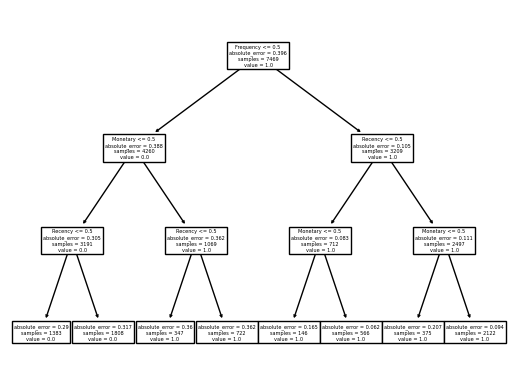

In [119]:
# Individual Decision Trees
tree.plot_tree(rfmodel1.estimators_[2], feature_names=dtmodel1.feature_names_in_.tolist())

In [5]:
# load the data
df2 = pd.read_csv(r'C:\Users\syzha\Downloads\Profile_final_0111.csv')
df2.head()

,Column1,gender,age,person,became_member_on,r_year,r_month,r_day,income,LargestTimePerPerson,Recency,OfferUseFrequency,Frequency,SumAmountPerPerson,Monetary,bogo?,discount?,RFM Score,bogo1_received,bogo1_completed,bogo2_received,bogo2_completed,bogo3_received,bogo3_completed,bogo4_received,...,Second_interested_coupon,bogo1_viewed_timediff,bogo2_viewed_timediff,bogo3_viewed_timediff,bogo4_viewed_timediff,discount1_viewed_timediff,discount2_viewed_timediff,discount3_viewed_timediff,discount4_viewed_timediff,bogo1_completed_timediff,bogo2_completed_timediff,bogo3_completed_timediff,bogo4_completed_timediff,discount1_completed_timediff,discount2_completed_timediff,discount3_completed_timediff,discount4_completed_timediff,bogo1_sensitivity,bogo2_sensitivity,bogo3_sensitivity,bogo4_sensitivity,discont1_sensitivity,discont2_sensitivity,discont3_sensitivity,discont4_sensitivity
0,59,M,45,186d6403f5824c739555b732f4af3f16,20171006,2017,10,6,48000,594,0,0,0,$17,0,0,0,0,1,0,0,0,0,0,0,...,bogo2,18,120,168,120,264,168,66,168,192,120,168,120,264,168,264,168,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,136,M,45,77927096ab4144fa930b4cadd4773cc2,20171007,2017,10,7,31000,462,0,0,0,$16.46,0,0,0,0,0,0,1,0,0,0,1,...,bogo2,168,6,168,12,264,168,240,168,168,144,168,144,264,168,240,168,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,160,M,38,d8567f1400d8486cb31c6abba64389ec,20171019,2017,10,19,64000,606,0,3,1,$150.94,1,1,0,11,2,2,0,0,1,1,0,...,bogo3,0,120,192,120,240,168,240,168,24,120,30,120,240,168,240,168,0.857143,0.0,0.821429,0.0,0.0,0.000000,0.0,0.0
3,178,M,55,3bd5ba038a5c46cc94e8cd5e5739c967,20171025,2017,10,25,65000,528,0,0,0,$16.69,0,0,0,0,1,0,1,0,0,0,0,...,bogo2,132,18,168,120,240,168,240,168,192,144,168,120,240,168,240,168,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,238,M,44,09e7e40eb89943458f4f79fe2e023dd6,20171011,2017,10,11,36000,678,1,1,0,$21.56,0,0,1,100,0,0,0,0,0,0,0,...,bogo1,168,120,168,120,240,0,6,192,168,120,168,120,240,102,264,192,0.000000,0.0,0.000000,0.0,0.0,0.392857,0.0,0.0


In [6]:
df2.shape

(14825, 126)

In [9]:
# Using LabelEncoder for label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['gender_LabelEncoded'] = le.fit_transform(df2['gender'])
df2['gender_LabelEncoded'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender_LabelEncoded, dtype: int32

In [10]:
x=df2[['age'
       ,'gender_LabelEncoded'
       ,'income'
       ,'Recency'
       ,'Frequency'
       ,'Monetary'
       
       ,'bogo1_received'
       ,'bogo2_received'
       ,'bogo2_received'
       ,'bogo2_received'
       ,'discount1_received'
       ,'discount2_received'
       ,'discount3_received'
       ,'discount4_received'
       
       ,'bogo1_difficulty'
       ,'bogo2_difficulty'
       ,'bogo3_difficulty'
       ,'bogo4_difficulty'
       ,'discount1_difficulty'
       ,'discount2_difficulty'
       ,'discount3_difficulty'
       ,'discount4_difficulty'
       
       ,'bogo1_duration'
       ,'bogo2_duration'
       ,'bogo3_duration'
       ,'bogo4_duration'
       ,'discount1_duration'
       ,'discount2_duration'
       ,'discount3_duration'
       ,'discount4_duration'
       
       ,'bogo1_completed_timediff'
       ,'bogo2_completed_timediff'
       ,'bogo3_completed_timediff'
       ,'bogo4_completed_timediff'
       ,'discount1_completed_timediff'
       ,'discount2_completed_timediff'
       ,'discount3_completed_timediff'
       ,'discount4_completed_timediff'
       
       
]]

In [11]:
y=df2[['bogo1_interest_score'
       ,'bogo2_interest_score'
       ,'bogo3_interest_score'
       ,'bogo4_interest_score'
       ,'discount1_interest_score'
       ,'discount2_interest_score'
       ,'discount3_interest_score'
       ,'discount4_interest_score'
    
    
]]

In [12]:
# split the data
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the dataset into train and test data
xtrain, xtest, ytrain, ytest =  train_test_split(x, y, test_size=0.2, random_state=234)

In [14]:
# import standard scaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
# fit calculates the mean and standard deviation
scaler = MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [16]:
# Now transform xtrain and xtest
Xtrain = scaler.transform(xtrain)
Xtest = scaler.transform(xtest)

In [17]:
# import the model
# from sklearn.neural_network import MLPClassifier
# from sklearn.multioutput import MultiOutputClassifier

from sklearn.neural_network import MLPRegressor

In [66]:
# fit/train the model. Check batch size. 
MLP = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=600, random_state=234)
MLP.fit(Xtrain, ytrain)

MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=600, random_state=234)

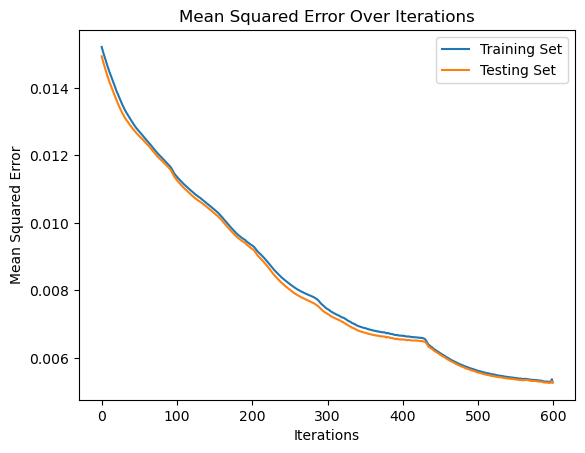

In [67]:
from sklearn.metrics import mean_squared_error

ytrain_preds = []
ytest_preds = []

# Fit the model and store predictions at each iteration
for i in range(MLP.max_iter):
    MLP.partial_fit(Xtrain, ytrain)
    ytrain_pred = MLP.predict(Xtrain)
    ytest_pred = MLP.predict(Xtest)
    ytrain_preds.append(mean_squared_error(ytrain, ytrain_pred))
    ytest_preds.append(mean_squared_error(ytest, ytest_pred))

# Plot the training and testing predictions over iterations
plt.plot(ytrain_preds, label='Training Set')
plt.plot(ytest_preds, label='Testing Set')
plt.title('Mean Squared Error Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [59]:
# make Predictions

ytrain_pred=MLP.predict(Xtrain)

ytest_pred = MLP.predict(Xtest)

In [64]:
mse_train_pred= mean_squared_error(ytrain, ytrain_pred)

mse_test_pred = mean_squared_error(ytest, ytest_pred)

print('mse_train_pred',mse_train_pred)

print('mse_test_pred',mse_test_pred)

mse_train_pred 0.012023252906991164
mse_test_pred 0.011805805632281707


In [65]:
from sklearn.metrics import mean_absolute_error
mae_train_pred = mean_absolute_error(ytrain, ytrain_pred)
mae_test_pred = mean_absolute_error(ytest, ytest_pred)

print('mae_train_pred',mae_train_pred)

print('mae_test_pred',mae_test_pred)

mae_train_pred 0.055809647491242585
mae_test_pred 0.055215671076441916


In [62]:
from sklearn.metrics import r2_score
r2_train_pred = r2_score(ytrain, ytrain_pred)
r2_test_pred = r2_score(ytest, ytest_pred)

print('r2_train_pred',r2_train_pred)

print('r2_test_pred',r2_test_pred)

r2_train_pred 0.9114145992696304
r2_test_pred 0.9112636667365238


In [63]:
rounded_ypred = np.round(ytest_pred, 2)
print(rounded_ypred)

[[ 0.02  0.03  0.05 ...  0.01  0.   -0.  ]
 [ 0.59  0.04  0.02 ...  0.01  0.98  0.99]
 [ 0.   -0.01  0.66 ...  0.01  0.09  0.07]
 ...
 [ 0.    0.01  0.02 ...  0.04 -0.01  0.  ]
 [ 0.02  0.83  0.03 ...  0.   -0.01  0.99]
 [ 0.01  0.02  1.21 ...  0.   -0.   -0.  ]]
